# Working with the Grand LAgrangian Deployment (GLAD) dataset by the CARTHE consortium

To process the [CARTHE GLAD](http://carthe.org/glad/) dataset, we follow steps similar to the ones found in `gdp.ipynb` for the hourly GDP dataset. One main difference is that we use a new preprocessing function (`data/glad.py`) tailored to the format of the tabular text format of this dataset.

In [1]:
from clouddrift import RaggedArray
import numpy as np
import matplotlib.pyplot as plt

## Dataset-specific functions

For this dataset, importing the glad module will automatically download `GLAD_15min_filtered.dat` from [the Gulf of Mexico Research Initiative Information and Data Cooperative (GRIIDC) repository](https://data.gulfresearchinitiative.org/data/R1.x134.073:0004) and stored it into the `data/raw/glad/` directory.

In [2]:
import sys
sys.path.append('../')
from data import glad

Dataset GLAD_15min_filtered.dat already in '../data/raw/glad/'.


We can test the preprocessing function by calling it with one of the identification numbers. This function returns an `xarray.Dataset`:

In [3]:
glad.preprocess(1)

<xarray.Dataset>
Dimensions:    (traj: 1, obs: 7695)
Coordinates:
    longitude  (obs) float64 -87.21 -87.21 -87.21 ... -84.61 -84.62 -84.62
    latitude   (obs) float64 28.56 28.56 28.56 28.56 ... 29.1 29.1 29.1 29.1
    time       (obs) float64 1.343e+09 1.343e+09 1.343e+09 ... 1.35e+09 1.35e+09
    ids        (obs) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
Dimensions without coordinates: traj, obs
Data variables:
    ID         (traj) int64 1
    rowsize    (traj) int64 7695
    err_pos    (obs) float64 10.0 10.0 10.0 10.0 10.0 ... 13.2 13.2 13.0 12.8
    ve         (obs) float64 0.022 0.021 0.021 0.022 ... -0.082 -0.077 -0.071
    vn         (obs) float64 -0.23 -0.213 -0.197 -0.184 ... -0.052 -0.052 -0.05
    err_vel    (obs) float64 0.033 0.033 0.033 0.033 ... 0.033 0.033 0.038 0.055
Attributes:
    title:    Glad experiment

Let's now prepare the data and metadata and pass it to the `RaggedArray` class to instantiate it:

In [4]:
files = [
    1,   2,   3,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,
    15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
    28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
    41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  52,  53,  54,
    55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
    68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
    83,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
    97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
    110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
    123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
    136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
    149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
    162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
    175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
    188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,
    201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
    214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,
    227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
    240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252,
    253, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266,
    267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279,
    280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 301, 302,
    303, 304, 306, 307, 308, 310, 313, 314, 315, 317, 451
]

coords = {'ids': 'ids', 'time': 'time', 'lon': 'longitude', 'lat': 'latitude'}
metadata = ['ID', 'rowsize']
data = ['ve', 'vn', 'err_pos', 'err_vel']

ra = RaggedArray.from_files(
    files,
    glad.preprocess,
    coords,
    metadata,
    data
)

Filling the Ragged Array: 100%|█████████████| 297/297 [00:00<00:00, 1659.78it/s]


## Export to NetCDF and Apache Parquet for storage

In [5]:
ra.to_parquet('../data/process/glad.parquet')
ra.to_netcdf('../data/process/glad.nc')

## Export to Xarray Dataset and Awkward Arrays for analysis

In [6]:
ds = ra.to_xarray()

In [7]:
ds

<xarray.Dataset>
Dimensions:  (traj: 297, obs: 1602882)
Coordinates:
    ids      (obs) int64 1 1 1 1 1 1 1 1 1 ... 451 451 451 451 451 451 451 451
    time     (obs) float64 1.343e+09 1.343e+09 1.343e+09 ... 1.346e+09 1.346e+09
    lon      (obs) float64 -87.21 -87.21 -87.21 -87.21 ... -87.09 -87.09 -87.08
    lat      (obs) float64 28.56 28.56 28.56 28.56 ... 26.34 26.33 26.33 26.33
Dimensions without coordinates: traj, obs
Data variables:
    ID       (traj) int64 1 2 3 4 5 6 7 8 10 ... 307 308 310 313 314 315 317 451
    rowsize  (traj) int64 7695 1385 2965 3729 5641 ... 1454 1749 1535 3077 2631
    ve       (obs) float64 0.022 0.021 0.021 0.022 ... 0.525 0.501 0.465 0.425
    vn       (obs) float64 -0.23 -0.213 -0.197 -0.184 ... -0.268 -0.248 -0.226
    err_pos  (obs) float64 10.0 10.0 10.0 10.0 10.0 ... 227.0 227.7 228.2 228.6
    err_vel  (obs) float64 0.033 0.033 0.033 0.033 ... 0.033 0.033 0.033 0.033
Attributes:
    title:    Glad experiment

In [8]:
ak = ra.to_awkward()

In [9]:
ak

<Array [{ID: 1, rowsize: 7695, ...}, ...] type='297 * struct[{ID: int64[par...'>

Here we show how the entirety of trajectories of the GLAD dataset can be plotted from either the *xarray Dataset* representation of the data (`ds`) or the *Awkward Array* representation of the data (`ak`). In both instances, we use a loop over each trajectory but for the xarray instance we first need to find the data indices of each single trajectory:

Text(0.5, 1.0, '100 random trajectories from the hourly GDP dataset')

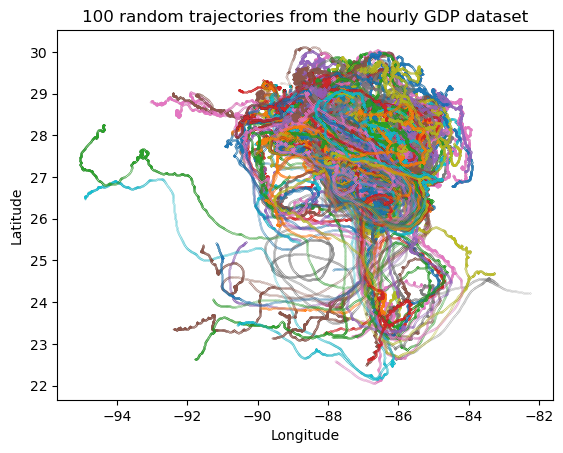

In [10]:
for id in files:
    this_drifter = ds.ids == id
    plt.plot(ds.lon[this_drifter], ds.lat[this_drifter], linestyle='', marker='.', ms=0.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('100 random trajectories from the hourly GDP dataset')

In contrast, for the awkward array, we simply need to loop over the trajectory indices:

Text(0.5, 1.0, '100 random trajectories from the hourly GDP dataset')

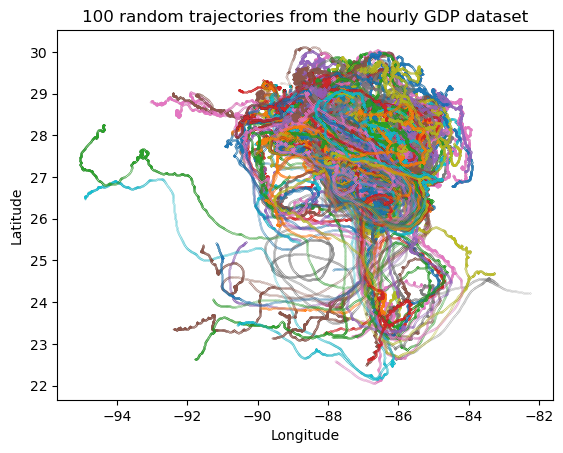

In [11]:
for n in range(len(files)):
    plt.plot(ak.obs['lon'][n], ak.obs['lat'][n], linestyle='', marker='.', ms=0.1)
    plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('100 random trajectories from the hourly GDP dataset')

Next we simply show how to plot the time series of velocity components using either the *xarray* or *awkward array* instances:

Text(0, 0.5, 'm s$^{-1}$')

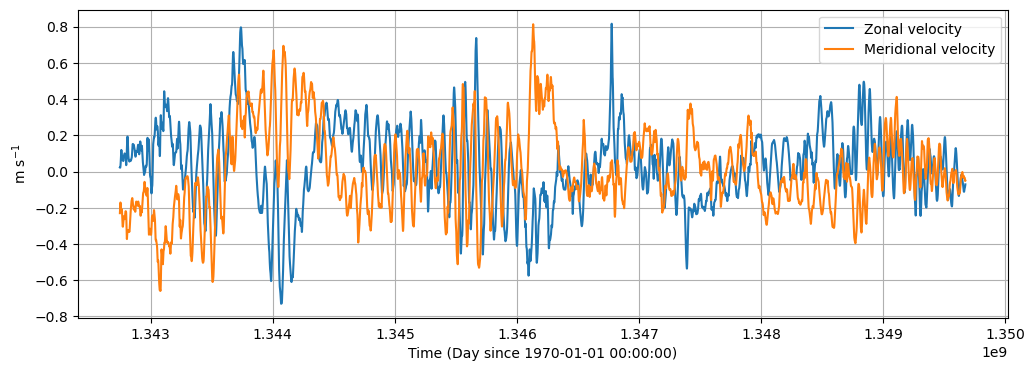

In [12]:
fig = plt.figure(figsize=(12, 4))
plt.plot(ds.time[ds.ids==1], ds.ve[ds.ids==1], label='Zonal velocity')
plt.plot(ds.time[ds.ids==1], ds.vn[ds.ids==1], label='Meridional velocity')
plt.legend()
plt.grid()
plt.xlabel('Time (Day since 1970-01-01 00:00:00)')
plt.ylabel('m s$^{-1}$')

Text(0, 0.5, 'm s$^{-1}$')

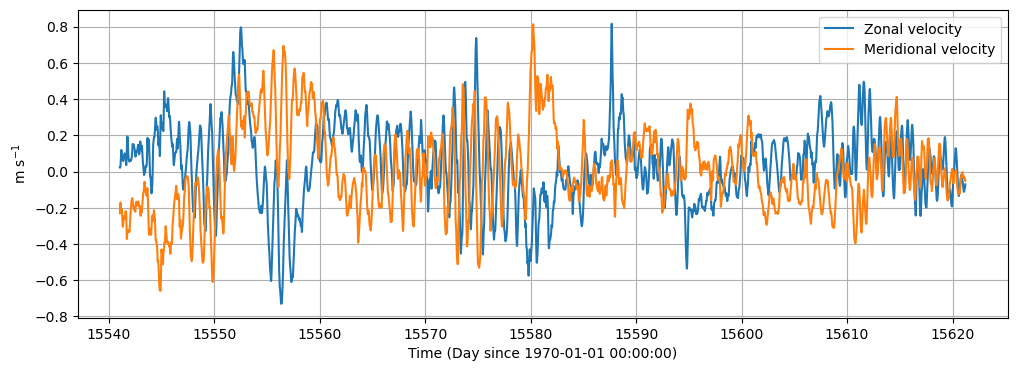

In [13]:
fig = plt.figure(figsize=(12, 4))
plt.plot(ak.obs['time'][0]/86400, ak.obs['ve'][0], label='Zonal velocity')
plt.plot(ak.obs['time'][0]/86400, ak.obs['vn'][0], label='Meridional velocity')
plt.legend()
plt.grid()
plt.xlabel('Time (Day since 1970-01-01 00:00:00)')
plt.ylabel('m s$^{-1}$')